## Predicting the Stock Price of INFOSYS using Deep learing RNN (LSTM) method

### Project Description: 
In this project i am going to Predict the closing price of a Corporation named(Infosys Ltd) using the past data of that company stock price, I have used the  Recurrent Neural Network called Long Short Term Memory (LSTM) for predicting the stock price of Infosys for the next day or 5 days

#### Importing the Necessary libraries

In [51]:
import math
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
sns.set_style("whitegrid")
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.layers import Dropout
import warnings
warnings.filterwarnings('ignore')

#### Read the Dataset for the further analysis

In [41]:
## Importing the dataset
df=pd.read_csv("INFY.csv")

In [42]:
### Checking the head section of data
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-02-12,10.85,10.86,10.76,10.77,10.491853,6300600
1,2019-02-13,10.85,10.87,10.77,10.80,10.521078,9532300
2,2019-02-14,10.65,10.76,10.62,10.76,10.482111,8443400
3,2019-02-15,10.68,10.78,10.64,10.76,10.482111,9269100
4,2019-02-19,10.47,10.57,10.38,10.55,10.277534,13443300


In [43]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
247,2020-02-05,11.10,11.13,11.03,11.04,11.04,10488300
248,2020-02-06,10.97,11.04,10.95,10.96,10.96,16312500
249,2020-02-07,10.95,10.99,10.84,10.85,10.85,8140300
250,2020-02-10,10.85,10.96,10.83,10.92,10.92,4589700
251,2020-02-11,10.97,11.03,10.93,10.95,10.95,6526500


#### Checking the shape of the dataset

In [45]:
## Get the Number of rows and columns in the dataset
df.shape 

(252, 7)

In [46]:
### Checking the data information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


#### Checking for the Null values to consider that our dataset is neat to do further steps

In [47]:
### Checking for Null values in the dataset
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

#### Looking the Statistical Overiew of Dataset using the describe method

In [48]:
### Describing the data to look the statistical overview of the dataset
df.describe(include='all')

,Date,Open,High,Low,Close,Adj Close,Volume
count,252,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
unique,252,NaN,NaN,NaN,NaN,NaN,NaN
top,2019-12-26,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,10.670913,10.748135,10.590714,10.667817,10.527684,1.196518e+07
std,NaN,0.590157,0.583960,0.585442,0.582393,0.557672,8.444294e+06
min,NaN,8.920000,8.990000,8.760000,8.930000,8.930000,1.730800e+06
25%,NaN,10.307500,10.360000,10.230000,10.297500,10.170281,6.945975e+06
50%,NaN,10.700000,10.770000,10.645000,10.720000,10.491647,9.298100e+06
75%,NaN,11.072500,11.160000,11.002500,11.072500,10.961408,1.370500e+07


In [49]:
## Checking for the number of unqiue values in the dataset
df.nunique()

Date         252
Open         151
High         152
Low          141
Close        152
Adj Close    183
Volume       252
dtype: int64

#### Let us do some **Feature Engineering** to get more details about the data

In [52]:
#Creating a copy
df_analysis=df.copy()

#Coverting date column to datetime data type
df_analysis['Date'] = df_analysis['Date'].apply(pd.to_datetime)

#Extracting Month, Week, Day,Day of week
df_analysis["Month"] = df_analysis.Date.dt.month
df_analysis["Week"] = df_analysis.Date.dt.week
df_analysis["Day"] = df_analysis.Date.dt.day
df_analysis["Day of week"] = df_analysis.Date.dt.dayofweek


#Setting date column as index
df_analysis.set_index("Date", drop=False, inplace=True)
df_analysis.iloc[:,7:11].head()

,Month,Week,Day,Day of week
Date,,,,
2019-02-12,2,7,12,1
2019-02-13,2,7,13,2
2019-02-14,2,7,14,3
2019-02-15,2,7,15,4
2019-02-19,2,8,19,1


#### Performing the Exploratory Data Analysis

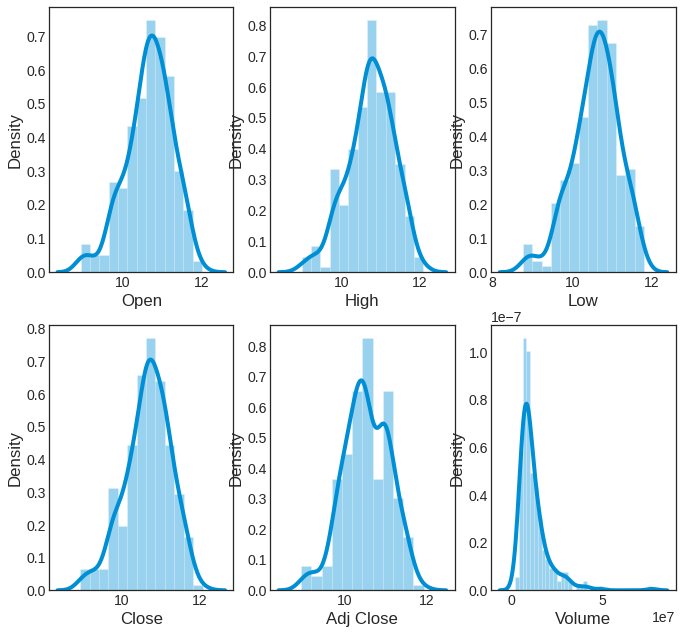

In [53]:
#Size and style of the plot
plt.figure(figsize = (15, 7))
plt.style.use('seaborn-white')

plt.subplot(231)
sns.distplot(df_analysis['Open'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(232)
sns.distplot(df_analysis['High'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(233)
sns.distplot(df_analysis['Low'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(234)
sns.distplot(df_analysis['Close'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(235)
sns.distplot(df_analysis['Adj Close'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(236)
sns.distplot(df_analysis['Volume'])
fig = plt.gcf()
fig.set_size_inches(10,10)

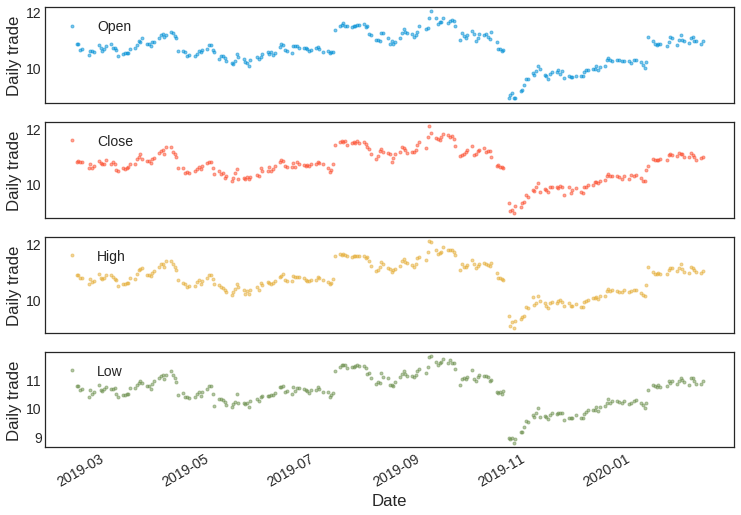

In [54]:
### Plot the Graph based on Daily trade Based on Open,close etc features

cols_plot = ['Open', 'Close', 'High','Low']
axes = df_analysis[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

#### Data Transformation

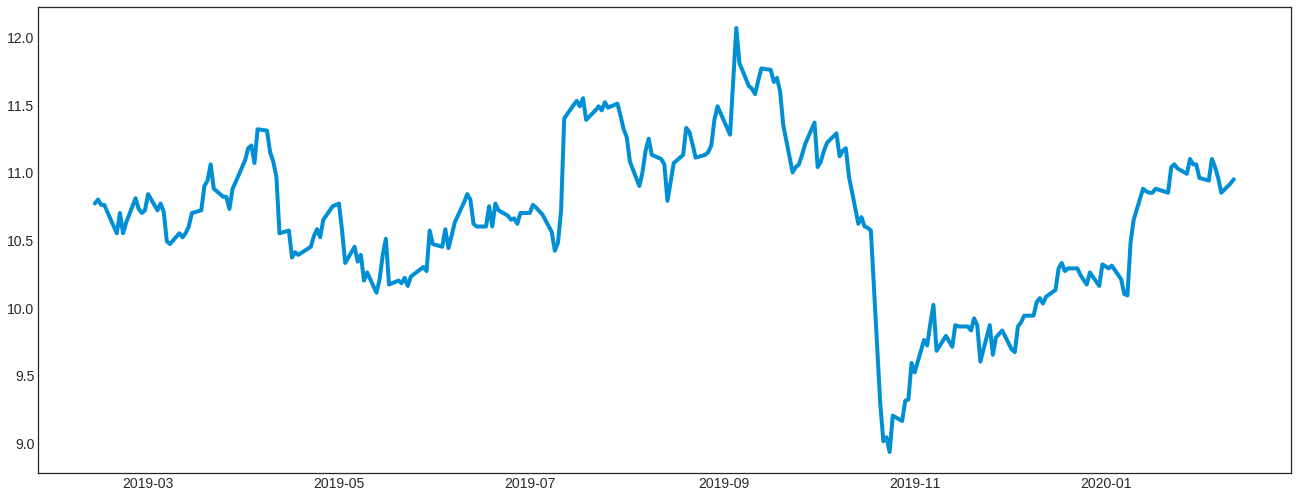

In [55]:
#setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y/%m/%d')
df.index = df['Date']

#plot
plt.figure(figsize=(20,8))
plt.plot(df['Close'], label='Historical Close Price')

#### Creating a Train data for further analysis and prediction part

In [56]:
## Create a New dataframe with only the Close column
data = df.filter(['Close'])

## Convert the dataframe to a numpy array
dataset = data.values

## Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset)*.8 )
training_data_len

202

#### Scaling the data to run the model effectively 

In [57]:
## Scaling the Data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.58598726],
       [0.5955414 ],
       [0.58280255],
       [0.58280255],
       [0.51592357],
       [0.56369427],
       [0.51592357],
       [0.54140127],
       [0.59872611],
       [0.57324841],
       [0.56369427],
       [0.57006369],
       [0.60828025],
       [0.57006369],
       [0.58598726],
       [0.56687898],
       [0.49681529],
       [0.49044586],
       [0.51592357],
       [0.50636943],
       [0.51592357],
       [0.53184713],
       [0.56369427],
       [0.57006369],
       [0.62738854],
       [0.64012739],
       [0.67834395],
       [0.62101911],
       [0.60191083],
       [0.60191083],
       [0.57324841],
       [0.62101911],
       [0.63694268],
       [0.68789809],
       [0.71656051],
       [0.72292994],
       [0.68152866],
       [0.7611465 ],
       [0.75796178],
       [0.70700637],
       [0.68471338],
       [0.64968153],
       [0.51592357],
       [0.52229299],
       [0.45859873],
       [0.47133758],
       [0.46496815],
       [0.484

#### Creating the Train set of data for training the model

In [58]:
## Create the training data set 
## create the scaled training data set
train_data = scaled_data[0:training_data_len, :]

## Split the data into X_train and y_train datasets

x_train= []
y_train= []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i,0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()

[array([0.58598726, 0.5955414 , 0.58280255, 0.58280255, 0.51592357,
       0.56369427, 0.51592357, 0.54140127, 0.59872611, 0.57324841,
       0.56369427, 0.57006369, 0.60828025, 0.57006369, 0.58598726,
       0.56687898, 0.49681529, 0.49044586, 0.51592357, 0.50636943,
       0.51592357, 0.53184713, 0.56369427, 0.57006369, 0.62738854,
       0.64012739, 0.67834395, 0.62101911, 0.60191083, 0.60191083,
       0.57324841, 0.62101911, 0.63694268, 0.68789809, 0.71656051,
       0.72292994, 0.68152866, 0.7611465 , 0.75796178, 0.70700637,
       0.68471338, 0.64968153, 0.51592357, 0.52229299, 0.45859873,
       0.47133758, 0.46496815, 0.48407643, 0.50955414, 0.52547771,
       0.50636943, 0.5477707 , 0.57961783, 0.58280255, 0.58598726,
       0.52229299, 0.44585987, 0.48407643, 0.44904459, 0.46496815])]
[0.404458598726114]

[array([0.58598726, 0.5955414 , 0.58280255, 0.58280255, 0.51592357,
       0.56369427, 0.51592357, 0.54140127, 0.59872611, 0.57324841,
       0.56369427, 0.57006369, 0.6082

In [59]:
## convert the X_train and y_train to numpy arrays
x_train, y_train = np.array(x_train),np.array(y_train)

In [60]:
## Reshape the x_train the data
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(142, 60, 1)

#### Building the LSTM model to the Trained data to the  Model for prediction

In [61]:
### Building the LSTM model 
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(rate = 0.2))

model.add(LSTM(units=50, return_sequences = True))
model.add(Dropout(rate = 0.2))

model.add(LSTM(units=50, return_sequences = True))
model.add(Dropout(rate = 0.2))

model.add(LSTM(50,return_sequences=False))
model.add(Dropout(rate = 0.2))

model.add(Dense(25))
model.add(Dense(1))

In [62]:
## Compile the Model
model.compile(optimizer='adam',loss='mean_squared_error')

In [63]:
## Train the model
model.fit(x_train, y_train, batch_size=30,epochs=50,verbose=1)

Epoch 1/50
5/5 [==============================] - 5s 20ms/step - loss: 0.2690
Epoch 2/50
5/5 [==============================] - 0s 18ms/step - loss: 0.0673
Epoch 3/50
5/5 [==============================] - 0s 16ms/step - loss: 0.0591
Epoch 4/50
5/5 [==============================] - 0s 16ms/step - loss: 0.0468
Epoch 5/50
5/5 [==============================] - 0s 13ms/step - loss: 0.0450
Epoch 6/50
5/5 [==============================] - 0s 12ms/step - loss: 0.0387
Epoch 7/50
5/5 [==============================] - 0s 12ms/step - loss: 0.0353
Epoch 8/50
5/5 [==============================] - 0s 15ms/step - loss: 0.0320
Epoch 9/50
5/5 [==============================] - 0s 16ms/step - loss: 0.0392
Epoch 10/50
5/5 [==============================] - 0s 15ms/step - loss: 0.0330
Epoch 11/50
5/5 [==============================] - 0s 14ms/step - loss: 0.0370
Epoch 12/50
5/5 [==============================] - 0s 15ms/step - loss: 0.0375
Epoch 13/50
5/5 [==============================] - 0s 15ms/st

#### Creating the Test data to make the model to give prediction on Unseen data

In [65]:
## Create the Testing dataset
## create a new array containing scaled values from index 144 - 253 
test_data = scaled_data[training_data_len -60: , :]
## Create the data set X_test and y_test

x_test= []
y_test = dataset[training_data_len:,:]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [66]:
## Convert the data to a numpy array

x_test = np.array(x_test)

In [67]:
## Reshape the data

x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1],1))

In [68]:
### Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [69]:
### Evaluate the model 
## Evaluating the model using the Root mean squared error

rmse = np.sqrt(np.mean(predictions-y_test)**2)
rmse

0.2066943473815919

#### Plotting the Final results of the Model prediction 

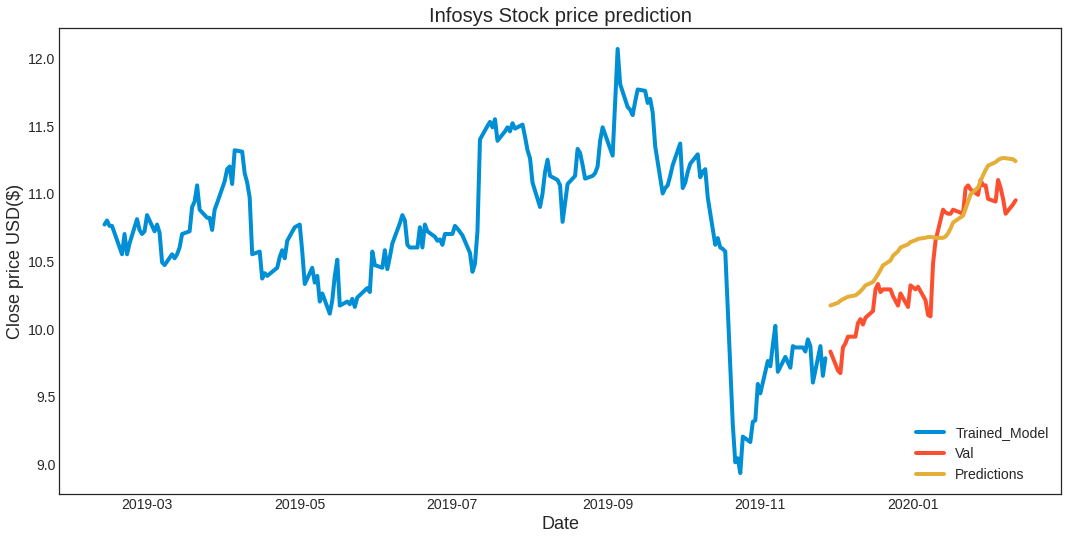

In [70]:
### Plot the data

train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions']=predictions

## visualize the data
plt.figure(figsize=(16,8))
plt.title('Infosys Stock price prediction')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close price USD($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Trained_Model','Val','Predictions'], loc='lower right')
plt.show()

In [71]:
## Show the Valid and Predicted Prices
valid

,Close,Predictions
Date,,
2019-11-29,9.83,10.170829
2019-12-02,9.69,10.190572
2019-12-03,9.67,10.205967
2019-12-04,9.86,10.217191
2019-12-05,9.89,10.226296
2019-12-06,9.94,10.235285
2019-12-09,9.94,10.246044
2019-12-10,10.04,10.259360
2019-12-11,10.07,10.276001
